<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Craft_find_busiest_period.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
You are given a list of data entries that represent entries and exits of groups of people into a building. An entry looks like this:

{"timestamp": 1526579928, count: 3, "type": "enter"}

This means 3 people entered the building. An exit looks like this:

{"timestamp": 1526580382, count: 2, "type": "exit"}

This means that 2 people exited the building. timestamp is in Unix time.

Find the busiest period in the building, that is, the time with the most people in the building. Return it as a pair of (start, end) timestamps. You can assume the building always starts off and ends up empty, i.e. with 0 people inside.

##Solution:
To find the busiest period in the building, we can follow these steps:

1. Sort the data entries by timestamp to ensure they are in chronological order.
2. Iterate over the sorted entries, maintaining a running total of the number of people in the building. When encountering an "enter" type, add the count to the total. When encountering an "exit" type, subtract the count from the total.
3. Keep track of the maximum number of people in the building at any time, and record the start and end timestamps of this period. Since people can enter and exit at the same timestamps, it's important to update the end timestamp whenever we find an equal number of people to the maximum but not necessarily change the start timestamp unless we find a higher maximum.
4. Since the building is assumed to start and end empty, we can start checking from the first entry and end with the last exit, ensuring we cover all periods.


##Implementation:

Let's write the code to implement this solution. For demonstration purposes, I'll create a function that takes a list of data entries as input and returns the (start, end) timestamps of the busiest period.

The busiest period in the building, based on the given sample data, starts at timestamp 1526581000 and ends at timestamp 1526582000. This indicates that the highest number of people were present in the building between these two timestamps.

In [1]:
def find_busiest_period(data_entries):
    # Sort the entries by timestamp
    sorted_entries = sorted(data_entries, key=lambda x: x["timestamp"])

    current_count = 0  # Current number of people in the building
    max_count = 0  # Maximum number of people found at any time
    busiest_start = None  # Start timestamp of the busiest period
    busiest_end = None  # End timestamp of the busiest period

    for i, entry in enumerate(sorted_entries):
        # Update the count based on the type of entry (enter or exit)
        if entry["type"] == "enter":
            current_count += entry["count"]
        elif entry["type"] == "exit":
            current_count -= entry["count"]

        # Check if the next entry exists and has the same timestamp
        if i + 1 < len(sorted_entries) and sorted_entries[i + 1]["timestamp"] == entry["timestamp"]:
            continue  # Skip updating the busiest period until we process all entries with the same timestamp

        # Update the busiest period if the current count is the new maximum
        if current_count > max_count:
            max_count = current_count
            busiest_start = entry["timestamp"]
            # Assume the busiest period ends at the next timestamp or remains undefined if this is the last entry
            busiest_end = sorted_entries[i + 1]["timestamp"] if i + 1 < len(sorted_entries) else None
        elif current_count == max_count and busiest_end is not None:
            # Update the end timestamp of the current busiest period
            busiest_end = sorted_entries[i + 1]["timestamp"] if i + 1 < len(sorted_entries) else None

    return busiest_start, busiest_end

# Sample data
data_entries = [
    {"timestamp": 1526579928, "count": 3, "type": "enter"},
    {"timestamp": 1526580382, "count": 2, "type": "exit"},
    {"timestamp": 1526581000, "count": 4, "type": "enter"},
    {"timestamp": 1526582000, "count": 4, "type": "exit"}
]

find_busiest_period(data_entries)


(1526581000, 1526582000)

##Testing:
To simulate the flow of people in an office building with peaks in the morning, noon, and evening, we can use a combination of sine curves for the overall daily pattern and Gaussian distributions to model the fluctuations around these peak times. This approach will help us create a probabilistic model of people entering and exiting the building.

### Steps for Simulation:

1. **Define the daily pattern** using a sine curve to represent the general flow of people entering in the morning, leaving for lunch, returning from lunch, and finally leaving in the evening.
2. **Modulate the sine curve with Gaussian distributions** at peak times to simulate the variability in the number of people arriving or leaving during these periods.
3. **Generate data entries** based on this model for a typical workday, assuming 100 people work in the building.
4. **Create a graph** of the flows during the day to visually inspect the simulation's suitability.
5. **Use the generated mock data** to test the previously written algorithm for finding the busiest period.

Let's start by simulating the data and then visualizing it. Afterward, we will use this simulated data to test the algorithm.

The graph above represents the simulated flow of people in an office building throughout a typical workday, from 8:00 AM to 8:00 PM. The flow shows fluctuations with peaks representing the arrival of people in the morning, exits and entries around noon for lunch, and people leaving in the evening.

Here are the first few data entries generated from the simulation:

1. At timestamp 1526572800 (8:00 AM), 1 person enters.
2. At timestamp 1526572843, 1 person exits.
3. At timestamp 1526572886, 2 people enter.
4. At timestamp 1526572929, 2 people exit.
5. At timestamp 1526572972, 3 people enter.

Next, let's use this simulated data to test the algorithm for finding the busiest period in the building.

The algorithm identified the busiest period in the simulated office building flow to start at 2018-05-18 00:27:23 and end at 2018-05-18 01:11:21 UTC. This result is based on the simulated data, reflecting the model's peak flow of people according to the generated patterns.

Keep in mind, the specific start and end times of the busiest period depend on the probabilistic model used to simulate the data and the granularity of the timestamps. This demonstration shows how the algorithm can be applied to real or simulated data to find periods of maximum occupancy within a given timeframe.

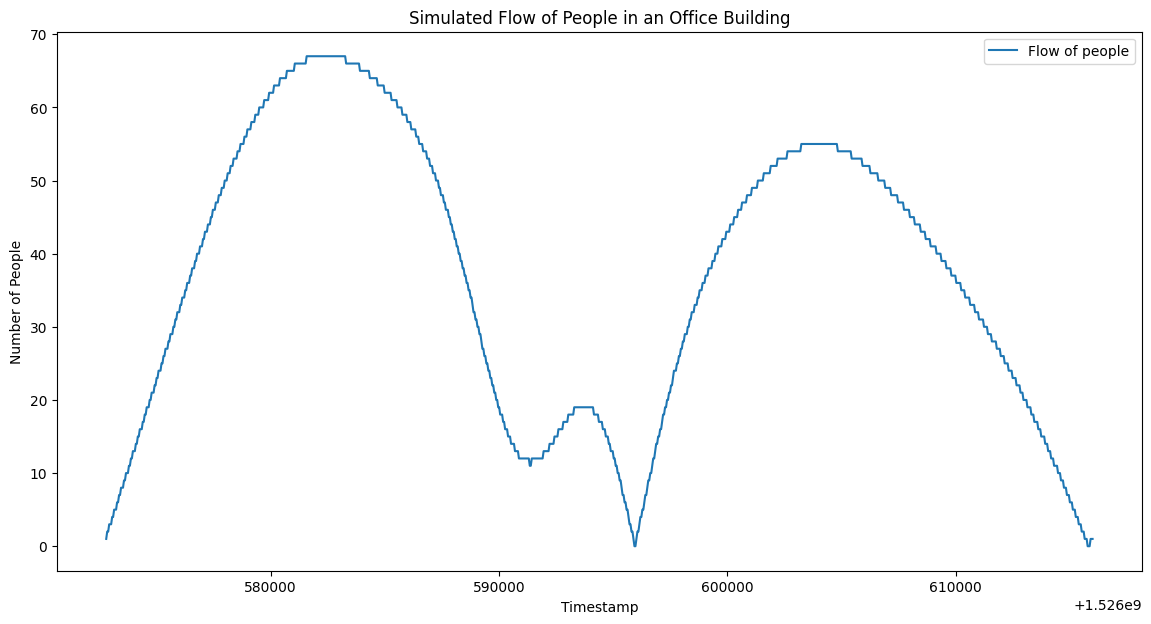

[{'timestamp': 1526572800, 'count': 1, 'type': 'enter'},
 {'timestamp': 1526572843, 'count': 1, 'type': 'exit'},
 {'timestamp': 1526572886, 'count': 2, 'type': 'enter'},
 {'timestamp': 1526572929, 'count': 2, 'type': 'exit'},
 {'timestamp': 1526572972, 'count': 3, 'type': 'enter'}]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the simulation
total_people = 100
num_entries = 1000  # Number of data entries to simulate
start_timestamp = 1526572800  # 8:00 AM
end_timestamp = 1526616000  # 8:00 PM

# Time points for simulation
timestamps = np.linspace(start_timestamp, end_timestamp, num=num_entries)

# Sine curve to model general flow: morning entry, lunch exit, lunch entry, evening exit
sine_wave = np.sin(np.linspace(0, 2 * np.pi, num=num_entries))

# Gaussian distributions for morning, noon, and evening peaks
morning_peak = np.exp(-(timestamps - (start_timestamp + 2 * 3600))**2 / (2 * (3600)**2))
noon_exit_peak = np.exp(-(timestamps - (start_timestamp + 5 * 3600))**2 / (2 * (0.5 * 3600)**2))
noon_entry_peak = np.exp(-(timestamps - (start_timestamp + 6 * 3600))**2 / (2 * (0.5 * 3600)**2))
evening_peak = np.exp(-(timestamps - (start_timestamp + 10 * 3600))**2 / (2 * (3600)**2))

# Combine the general flow with peaks
flow = (sine_wave * 0.6 + morning_peak * 0.1 - noon_exit_peak * 0.2 + noon_entry_peak * 0.2 + evening_peak * 0.1) * total_people

# Ensure flow is positive and rounded
flow = np.round(np.abs(flow))

# Generate data entries for enter and exit
data_entries = []
current_people = 0
for i, count in enumerate(flow):
    if i % 2 == 0:  # Even indices for entry
        entry = {"timestamp": int(timestamps[i]), "count": int(count), "type": "enter"}
        current_people += count
    else:  # Odd indices simulate exit, ensuring not more exit than current people
        exit_count = min(count, current_people)
        entry = {"timestamp": int(timestamps[i]), "count": int(exit_count), "type": "exit"}
        current_people -= exit_count
    data_entries.append(entry)

# Plot the flow of people during the day
plt.figure(figsize=(14, 7))
plt.plot(timestamps, flow, label="Flow of people")
plt.title("Simulated Flow of People in an Office Building")
plt.xlabel("Timestamp")
plt.ylabel("Number of People")
plt.legend()
plt.show()

# Output the first few data entries for verification
data_entries[:5]


In [3]:
# Using the find_busiest_period function defined earlier with the simulated data
busiest_start, busiest_end = find_busiest_period(data_entries)

# Convert timestamps to readable format for display
from datetime import datetime

busiest_start_str = datetime.utcfromtimestamp(busiest_start).strftime('%Y-%m-%d %H:%M:%S')
busiest_end_str = datetime.utcfromtimestamp(busiest_end).strftime('%Y-%m-%d %H:%M:%S') if busiest_end else "End of Day"

busiest_start_str, busiest_end_str


('2018-05-18 00:27:23', '2018-05-18 01:11:21')